# Домашнее задание 
# Математика — Домашнее задание 7
# А.&#8201;Д. Егоров<h1/>

In [51]:
import numpy as np
import scipy as sp 

import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from collections import Counter

import datetime
from dateutil.parser import parse

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
%matplotlib inline

## Датасет из прошлого ДЗ

Данные взяты отсюда: https://www.kaggle.com/datasets/kallefischer/app-user-dataset

In [2]:
df_users = pd.read_csv("./user_demographics.csv")
df_users["uid"] = df_users["uid"].agg(func=lambda x: int(x))
df_users

,uid,reg_date,device,gender,country,age
0,54030035,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338,2017-03-26T00:00:00Z,iOS,M,FRA,59
...,...,...,...,...,...,...
9995,43138741,2016-11-23T00:00:00Z,and,M,BRA,16
9996,30326568,2016-08-21T00:00:00Z,and,M,BRA,15
9997,92384369,2015-08-20T00:00:00Z,and,F,DEU,33
9998,98809962,2017-04-08T00:00:00Z,iOS,F,FRA,32


Сгенерируем фейковые данные о времени, проведенном пользователем в сервисе. 

In [3]:
# Изначально сделаем так, что чем меньше возраст, тем больше времени он проводит в сервисе
df_users["time_spent"] = df_users["age"].values.max() - (df_users["age"] - df_users["age"].values.mean())
df_users["time_spent"] = df_users["time_spent"].agg(func=lambda x: x * abs(np.random.normal(2, 1.2)))

# Поправка на время взаимодействи в зависимости от страны
mult = dict(zip(df_users["country"].unique(), [1.3, 0.9, 1., 1.2, 1.03, 1.05]))
df_users["time_spent"] = df_users["time_spent"] * df_users["country"].apply(func=lambda x: mult[x])

# Поправка на время взаимодействия с сервисом в зависимости от пола
mult = dict(zip(["M", "F"], [1.2, 1.]))
df_users["time_spent"] = df_users["time_spent"] * df_users["gender"].apply(func=lambda x: mult[x])

df_users

,uid,reg_date,device,gender,country,age,time_spent
0,54030035,2017-06-29T00:00:00Z,and,M,USA,19,265.462503
1,72574201,2018-03-05T00:00:00Z,iOS,F,TUR,22,167.401951
2,64187558,2016-02-07T00:00:00Z,iOS,M,USA,16,233.624237
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,9.277666
4,99231338,2017-03-26T00:00:00Z,iOS,M,FRA,59,149.125906
...,...,...,...,...,...,...,...
9995,43138741,2016-11-23T00:00:00Z,and,M,BRA,16,157.021148
9996,30326568,2016-08-21T00:00:00Z,and,M,BRA,15,398.574667
9997,92384369,2015-08-20T00:00:00Z,and,F,DEU,33,159.732893
9998,98809962,2017-04-08T00:00:00Z,iOS,F,FRA,32,157.832129


Посмотрим на распределение возраста пользователей

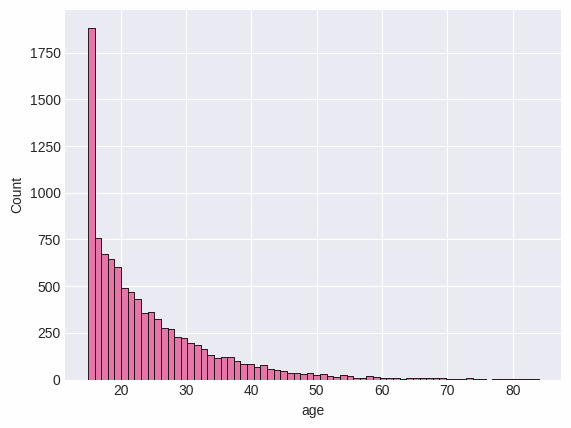

In [4]:
sns.histplot(df_users["age"])
sns.histplot(df_users["age"])
plt.show()

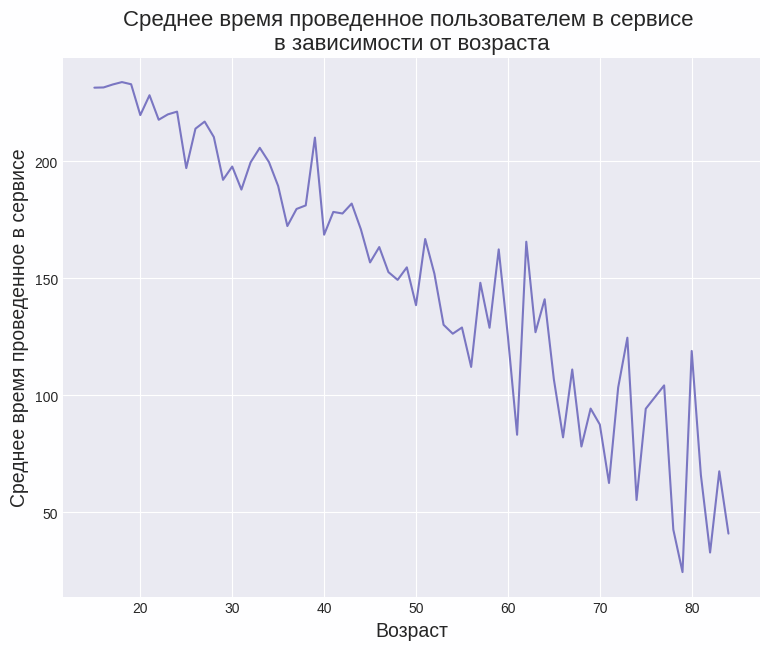

In [5]:
plt.figure(figsize=(9,7))
plt.plot(
    sorted(df_users["age"].unique()),
    df_users.groupby(by="age").agg({"time_spent": "mean"})
)
plt.title("Cреднее время проведенное пользователем в сервисе \nв зависимости от возраста", fontsize=16)
plt.xlabel("Возраст", fontsize=14)
plt.ylabel("Среднее время проведенное в сервисе", fontsize=14)
plt.show()

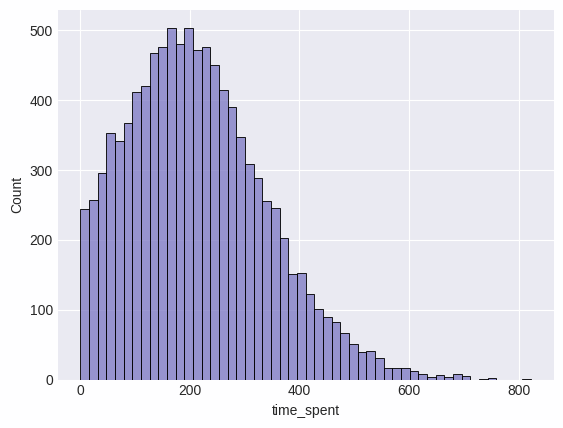

In [11]:
sns.histplot(df_users["time_spent"])
plt.show()

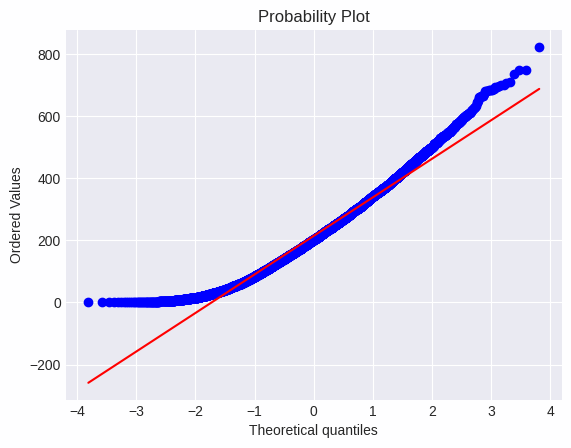

In [91]:
sp.stats.probplot(df_users["time_spent"], dist="norm", plot=plt)
plt.show()

Посмотрим, какие страны присутствуют в выборке:

In [6]:
df_users["country"].unique()

array(['USA', 'TUR', 'BRA', 'FRA', 'DEU', 'CAN'], dtype=object)

Количество пользователей из разных стран:

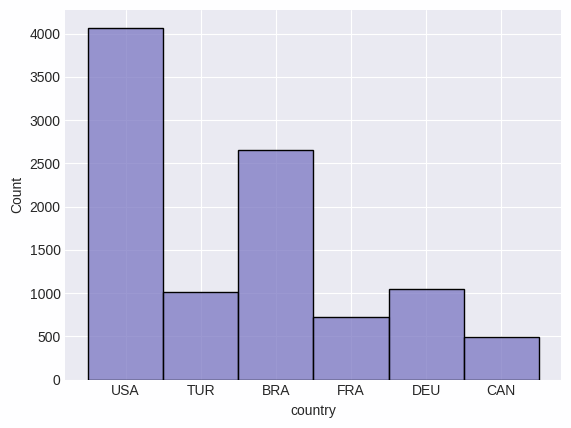

In [7]:
sns.histplot(df_users["country"])
plt.show()

Посмотрим на даты регистрации и количество регистраций в тот или иной год

In [8]:
print(Counter(df_users["reg_date"].apply(lambda x: parse(x).year)))
print(min(df_users["reg_date"].apply(lambda x: parse(x))))
print(max(df_users["reg_date"].apply(lambda x: parse(x))))


Counter({2017: 4916, 2018: 2482, 2016: 2027, 2015: 575})
2015-01-16 00:00:00+00:00
2018-03-18 00:00:00+00:00


## Задание 1

Сформировать двухвыборочные гипотезы касательно медиан и распределений для дискретного и непрерывного случая. Если дискретного показателя нет - создайте его дополнительно. Итого 4 гипотезы (4 пункта).

### Сформулируем двувыборочные гипотезы: 

#### Связные: 
1. Медианы возраста зарегистрированных людей в 2017 и 2018 годах совпадают.
2. Распределение времени проведенного людьми времени в сервисе в 2017 и 2018 годах совпадают.

#### Несвязные:
3. Предпочтения в выборе OS у мужчин и женщин. Правда ли, что распределения одинаковы.
4. Распределения времени, проведенного людьми в сервисе, для Бразилии и США совпадаю с точностью до смещения.

## Задание 2

### Гипотеза 1 (связная)

**Медианы возраста зарегистрированных людей в 2017 и 2018 годах совпадают (возраст &mdash; дискретная величина).**

Для начала получим данные из таблицы:

In [27]:
df_users_2017 = df_users[df_users["reg_date"].apply(lambda x: parse(x).year) == 2017].sort_values(by="reg_date")
df_users_2017

,uid,reg_date,device,gender,country,age,time_spent
5929,24248294,2017-01-01T00:00:00Z,and,M,BRA,18,316.556151
2072,53992590,2017-01-01T00:00:00Z,iOS,F,USA,50,136.258056
3187,53830217,2017-01-01T00:00:00Z,and,M,USA,38,310.964016
8978,45991562,2017-01-01T00:00:00Z,and,M,BRA,19,359.785351
5811,29020754,2017-01-01T00:00:00Z,iOS,F,TUR,18,98.463094
...,...,...,...,...,...,...,...
6707,20642238,2017-12-31T00:00:00Z,and,M,USA,36,138.388991
9904,73324422,2017-12-31T00:00:00Z,iOS,F,DEU,36,64.572747
2549,38880120,2017-12-31T00:00:00Z,iOS,M,TUR,23,284.528894
7139,29843758,2017-12-31T00:00:00Z,iOS,F,USA,22,94.443535


In [26]:
df_users_2018 = df_users[df_users["reg_date"].apply(lambda x: parse(x).year) == 2018].sort_values(by="reg_date")
df_users_2018

,uid,reg_date,device,gender,country,age,time_spent
3163,14137740,2018-01-01T00:00:00Z,and,F,BRA,35,161.785274
6237,53460798,2018-01-01T00:00:00Z,iOS,M,USA,20,41.165692
9583,22329841,2018-01-01T00:00:00Z,and,F,USA,19,560.250877
3854,71379039,2018-01-01T00:00:00Z,iOS,F,BRA,25,242.015429
2006,52029755,2018-01-01T00:00:00Z,and,M,DEU,24,239.329388
...,...,...,...,...,...,...,...
8723,88749692,2018-03-18T00:00:00Z,and,F,USA,43,264.062945
8232,26545487,2018-03-18T00:00:00Z,and,F,USA,22,398.187372
908,86080479,2018-03-18T00:00:00Z,and,F,BRA,18,185.141637
2871,44154700,2018-03-18T00:00:00Z,and,F,USA,16,449.079127


Применим для гипотезы 1 критерий Уилкоксона (данный критерий непараметрический, подходит для сравнения медиан связных выборок).

Так как на выборки налогается ограничение, что их размер должен быть одинаковым, то урежем выборку за 2017 год: возьмем последние 2482 записи:

In [28]:
df_users_2017 = df_users_2017[-2482:]
df_users_2017

,uid,reg_date,device,gender,country,age,time_spent
760,62331433,2017-08-11T00:00:00Z,and,M,BRA,26,82.709320
5946,15548925,2017-08-11T00:00:00Z,and,F,TUR,26,82.506648
373,42220050,2017-08-11T00:00:00Z,iOS,F,BRA,20,67.020354
973,69707081,2017-08-11T00:00:00Z,and,M,USA,38,143.212130
4588,66631587,2017-08-11T00:00:00Z,iOS,F,USA,18,383.516407
...,...,...,...,...,...,...,...
6707,20642238,2017-12-31T00:00:00Z,and,M,USA,36,138.388991
9904,73324422,2017-12-31T00:00:00Z,iOS,F,DEU,36,64.572747
2549,38880120,2017-12-31T00:00:00Z,iOS,M,TUR,23,284.528894
7139,29843758,2017-12-31T00:00:00Z,iOS,F,USA,22,94.443535


Проведем тест Уилкоксона:

In [31]:
sp.stats.wilcoxon(df_users_2017["age"], df_users_2018["age"], alternative="two-sided")

WilcoxonResult(statistic=1382129.0, pvalue=0.5182148159242556)

$pvalue > 0.05$, следовательно, гипотезу 1 принимаем.

### Гипотеза 2 (связная)
**Распределение времени проведенного людьми времени в сервисе в 2017 и 2018 годах совпадают.**

Для проверки данной гипотезы воспользуемся тестом Колмогорова-Смирнова (параметрический тест), т.к. мы пытаемся понять из одно ли распределения пришли данные выборки.

In [32]:
sp.stats.ks_2samp(df_users_2017["time_spent"], df_users_2018["time_spent"], alternative="two-sided")

KstestResult(statistic=0.023771152296535054, pvalue=0.48472904507266695, statistic_location=318.65452559272114, statistic_sign=-1)

$pvalue > 0.05$, следовательно, гипотезу 2 принимаем.

### Гипотеза 3 (несвязная)
**Предпочтения в выборе OS у мужчин и женщин. Правда ли, что распределения одинаковы.**

Проверять данную гипотезу будем тест хи-квадрат на независимость переменных в таблице случайных величин, т. к. исследуемые величины дискретные и  гипотеза составлена относительно распределений. Составим таблицу сопряженности для двух распределений: 

In [36]:
# Составим таблицу
#                   iOS             and
#    Male   count(M & iOS)  count(M & and)
#  Female   count(F & iOS)  count(F & and)
#

MF_OS_data = [
    [
        df_users[(df_users["gender"] == "M") & (df_users["device"] == "iOS")].shape[0],
        df_users[(df_users["gender"] == "M") & (df_users["device"] == "and")].shape[0],
    ],
    [
        df_users[(df_users["gender"] == "F") & (df_users["device"] == "iOS")].shape[0],
        df_users[(df_users["gender"] == "F") & (df_users["device"] == "and")].shape[0],
    ]
]

pd.DataFrame(MF_OS_data, columns=["iOS", "and"], index=["M", "F"])

,iOS,and
M,2030,2770
F,2160,3040


In [37]:
sp.stats.chi2_contingency(MF_OS_data)

Chi2ContingencyResult(statistic=0.5511469940187264, pvalue=0.4578494114061443, dof=1, expected_freq=array([[2011.2, 2788.8],
       [2178.8, 3021.2]]))

$pvalue > 0.05$, следовательно, гипотеза 3 верна, т.е. выборки взяты из одного распределения.


### Гипотеза 4 (несвязная)
**Распределения времени, проведенного людьми в сервисе, для Бразилии и США совпадаю с точностью до смещения.**

Для данной гипотезы воспользуемся тестом Уилкоксона-Манна-Уитни, т. к. речь идет о форме распределений, т. е. выборки из одного распределения, но различаются сдвигом.

Получим необходимые данные из таблицы:

In [38]:
df_users_BRA = df_users[df_users["country"] == "BRA"]
df_users_BRA

,uid,reg_date,device,gender,country,age,time_spent
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41,9.277666
6,16377492,2016-10-16T00:00:00Z,and,M,BRA,20,150.781800
9,40461463,2017-07-16T00:00:00Z,and,M,BRA,32,266.291532
14,74263197,2017-06-22T00:00:00Z,and,F,BRA,24,154.888886
17,73480791,2017-08-20T00:00:00Z,iOS,M,BRA,45,299.695988
...,...,...,...,...,...,...,...
9987,65979851,2018-02-28T00:00:00Z,iOS,F,BRA,15,234.459138
9988,17231199,2017-11-10T00:00:00Z,and,F,BRA,21,133.866317
9990,67294307,2017-06-07T00:00:00Z,iOS,M,BRA,40,247.724978
9995,43138741,2016-11-23T00:00:00Z,and,M,BRA,16,157.021148


In [39]:
df_users_USA = df_users[df_users["country"] == "USA"]
df_users_USA

,uid,reg_date,device,gender,country,age,time_spent
0,54030035,2017-06-29T00:00:00Z,and,M,USA,19,265.462503
2,64187558,2016-02-07T00:00:00Z,iOS,M,USA,16,233.624237
5,64229733,2017-05-17T00:00:00Z,and,F,USA,17,470.441450
7,36350096,2017-04-07T00:00:00Z,and,M,USA,23,176.437304
8,98955454,2016-08-11T00:00:00Z,and,M,USA,22,18.900489
...,...,...,...,...,...,...,...
9982,91337513,2017-03-19T00:00:00Z,and,F,USA,18,207.898571
9983,32143131,2017-11-15T00:00:00Z,iOS,M,USA,24,315.521736
9991,59059766,2016-03-03T00:00:00Z,iOS,M,USA,23,400.821906
9993,12936762,2015-09-03T00:00:00Z,and,F,USA,32,164.153920


Проведем тест Манна-Уитни:

In [ ]:
sp.stats.mannwhitneyu(df_users_USA["time_spent"], df_users_BRA["time_spent"], alternative="two-sided")

MannwhitneyuResult(statistic=6677841.0, pvalue=7.978179021617508e-61)

$pvalue < 0.05$, значит, либо распределения неоднородны, либо существует сдвиг.

Построим kdeplot

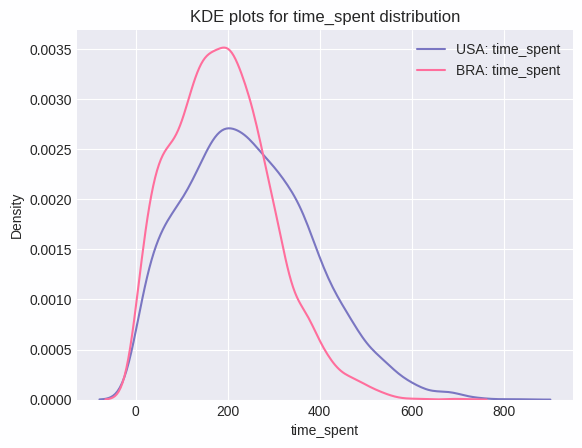

In [40]:
sns.kdeplot(df_users_USA["time_spent"], label="USA: time_spent")
sns.kdeplot(df_users_BRA["time_spent"], label="BRA: time_spent")
plt.title("KDE plots for time_spent distribution")
plt.legend()
plt.show()

Видно, что формы распределений плюс-минус похожи: более широкие хвосты для выборки по США, скорее всего вызваны ее размером.
Вычислим смещение одной выборки относительно другой:

In [48]:
shift = np.percentile(df_users_USA["time_spent"], q=50) - np.percentile(df_users_BRA["time_spent"], q=50)
shift

52.071360942192484

Проведем тест Манна-Уитни еще раз, но уже со смещением:

In [49]:
sp.stats.mannwhitneyu(df_users_USA["time_spent"] - shift, df_users_BRA["time_spent"], alternative="two-sided")

MannwhitneyuResult(statistic=5414815.0, pvalue=0.8303078050287779)

$pvalue > 0.05$, а, следовательно, гипотеза 4 подтверждена. Построим kdeplot для смещенной выборки:

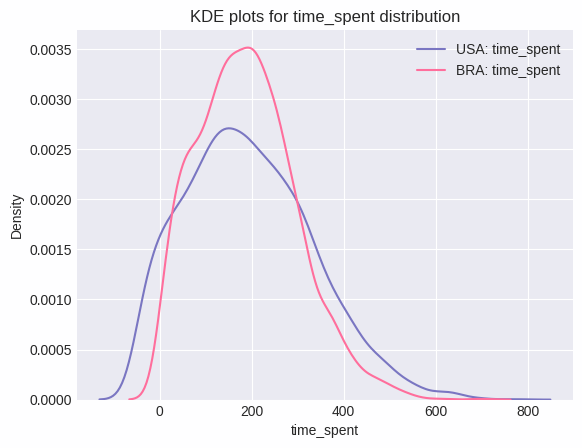

In [44]:
sns.kdeplot(df_users_USA["time_spent"] - shift, label="USA: time_spent")
sns.kdeplot(df_users_BRA["time_spent"], label="BRA: time_spent")
plt.title("KDE plots for time_spent distribution")
plt.legend()
plt.show()

Хоть плотности и визуально похожи, возможно, что мы использовали тест некорректно. Дополнительно проверим гипотезу о том, что обе выборки относятся к одному распределению, через тест Колмогорова-Смирнова: 

In [209]:
sp.stats.ks_2samp(df_users_USA["time_spent"] - shift, df_users_BRA["time_spent"], alternative="two-sided")

KstestResult(statistic=0.08916783651275827, pvalue=1.4599464385921613e-11, statistic_location=26.305236530802176, statistic_sign=1)

По данному критерию, гипотезу стоит отвергуть: $pvalue < 0.05$. 

Хотя, если ориентироваться на здравый смысл, врядли можно счесть, что закон, по которому люди проводят время в сервисе, будет отличен в какой-либо точке мира: всегда будут люди кто проводит времени в сервисе меньше или больше остальных, а такие факторы (останавливающие\сдерживающие) как: доступность интернета или законы действующие на территории страны, в той или иной мере, ограничивающие доступ к ресурсу, как раз и сказываются на видимой разнице данных на графике.

### Бутстрап

#### 1. Медианы возраста зарегистрированных людей в 2017 и 2018 годах совпадают.


In [207]:
X_median = []
Y_median = []
for _ in range(1000):
    X_median.append(
        np.median(np.random.choice(df_users_2017["age"], size=df_users_2017.shape[0], replace=True))
    )
    Y_median.append(
        np.median(np.random.choice(df_users_2018["age"], size=df_users_2018.shape[0], replace=True))
    )

print(np.mean(X_median), np.percentile(X_median, q=[2.5, 97.5]))
print(np.mean(Y_median), np.percentile(Y_median, q=[2.5, 97.5]))
print(f"abs_err = {np.fabs(np.mean(X_median) - np.mean(Y_median))}")
print(f"rel_err = {np.fabs(np.mean(X_median) - np.mean(Y_median)) / np.mean(X_median)}")

21.1735 [21. 22.]
21.299 [21. 22.]
abs_err = 0.12549999999999883
rel_err = 0.005927220346187396


Относительная ошибка меньше 1%, да, и доверительные интервалы совпадают, так что гипотезу 1 принимаем.

#### 2. Распределение времени проведенного людьми времени в сервисе в 2017 и 2018 годах совпадают.

In [195]:
X_mean = []
X_var = []
X_cm_3 = []  # central moment 3-d order
X_cm_4 = []  # central moment 4-th order

Y_mean = []
Y_var = []
Y_cm_3 = []  # central moment 3-d order
Y_cm_4 = []  # central moment 4-th order


for _ in range(1000):
    X = np.random.choice(df_users_2017["time_spent"], size=df_users_2017.shape[0], replace=True)
    Y = np.random.choice(df_users_2018["time_spent"], size=df_users_2018.shape[0], replace=True)

    X_mean.append(np.mean(X))
    X_var.append(np.var(X))
    X_cm_3.append(sp.stats.moment(X, moment=3))
    X_cm_4.append(sp.stats.moment(X, moment=4))

    Y_mean.append(np.mean(Y))
    Y_var.append(np.var(Y))
    Y_cm_3.append(sp.stats.moment(Y, moment=3))
    Y_cm_4.append(sp.stats.moment(Y, moment=4))

X_minus_Y_mean = np.array(X_mean) - np.array(Y_mean)
X_minus_Y_var = np.array(X_var) - np.array(Y_var)
X_minus_Y_cm_3 = np.array(X_cm_3) - np.array(Y_cm_3)
X_minus_Y_cm_4 = np.array(X_cm_4) - np.array(Y_cm_4)

X_mean = np.mean(X_mean)
X_var = np.mean(X_var)
X_cm_3 = np.mean(X_cm_3)
X_cm_4 = np.mean(X_cm_4)

Y_mean = np.mean(Y_mean)
Y_var = np.mean(Y_var)
Y_cm_3 = np.mean(Y_cm_3)
Y_cm_4 = np.mean(Y_cm_4)

df_time_17_18 = pd.DataFrame(
    [
        [X_mean, X_var, X_cm_3, X_cm_4],
        [Y_mean, Y_var, Y_cm_3, Y_cm_4],
        [
            X_minus_Y_mean.mean(),
            X_minus_Y_var.mean(),
            X_minus_Y_cm_3.mean(),
            X_minus_Y_cm_4.mean(),
        ],
        [
            X_minus_Y_mean.mean() / X_mean,
            X_minus_Y_var.mean() / X_var,
            X_minus_Y_cm_3.mean() / X_cm_3,
            X_minus_Y_cm_4.mean() / X_cm_4,
        ],
    ],
    columns=["mean", "var", "cm_3", "cm_4"],
    index=["2017", "2018", "abs_err", "rel_err"],
)
df_time_17_18

,mean,var,cm_3,cm_4
2017,216.833237,16169.496514,1.139036e+06,7.948139e+08
2018,215.815730,15944.906291,1.209837e+06,8.310220e+08
abs_err,1.017507,224.590223,-7.080040e+04,-3.620804e+07
rel_err,0.004693,0.013890,-6.215815e-02,-4.555537e-02


##### Пояснение к таблице:  
Значения 2017 года были приняты за эталонные: по ним вычислили абсолютную и относительную ошибки.

##### Вывод
Относительная погрешность для всех моментов 1 и 2 порядков составляет меньше 1.5%, а для 3 и 4 меньше 6%, следовательно, можно заявить о схожести распределений.

#### 3. Предпочтения в выборе OS у мужчин и женщин. Правда ли, что распределения одинаковы.

Проведем бутстрап по выборкам выбора OS в зависимости от пола. 
Будем сравнивать среднее отношение количества пользователей с iOS к количеству пользователей с and среди мужчин и женщин.

In [198]:
df_M_OS = df_users[df_users["gender"] == "M"][["gender", "device"]]
df_F_OS = df_users[df_users["gender"] == "F"][["gender", "device"]]

M_rel_iOS_to_and = []
F_rel_iOS_to_and = []
for _ in range(1000):
    M_OS = np.random.choice(df_M_OS["device"].values, size=df_M_OS.shape[0], replace=True)
    F_OS = np.random.choice(df_F_OS["device"].values, size=df_F_OS.shape[0], replace=True)

    tmp_cnt = Counter(M_OS)
    M_rel_iOS_to_and.append(
        tmp_cnt["iOS"] / tmp_cnt["and"]
    )

    tmp_cnt = Counter(F_OS)
    F_rel_iOS_to_and.append(
        tmp_cnt["iOS"] / tmp_cnt["and"]
    )

df_mean_rel_iOS_to_and = pd.DataFrame(
    [[np.mean(M_rel_iOS_to_and), np.mean(F_rel_iOS_to_and)]],
    columns=["M", "F"],
    index=["mean_rel_iOS_to_and"]
)
df_mean_rel_iOS_to_and


,M,F
mean_rel_iOS_to_and,0.732833,0.710193


Вычислим абсолютную и относительную ошибки (Male &mdash; эталон):

In [199]:
df_mean_rel_iOS_to_and["abs_err"] = np.fabs(df_mean_rel_iOS_to_and["M"] - df_mean_rel_iOS_to_and["F"])
df_mean_rel_iOS_to_and["rel_err"] = df_mean_rel_iOS_to_and["abs_err"] / df_mean_rel_iOS_to_and["M"]
df_mean_rel_iOS_to_and

,M,F,abs_err,rel_err
mean_rel_iOS_to_and,0.732833,0.710193,0.02264,0.030894


Относительная ошибка составила меньше 3.5%, следовательно, делаем вывод об однородности распределений.

#### 4. Распределения времени, проведенного людьми в сервисе, для Бразилии и США совпадаю с точностью до смещения.

In [205]:
# shift = np.percentile(df_users_USA["time_spent"], q=50) - np.percentile(df_users_BRA["time_spent"], q=50)
shift = df_users_USA["time_spent"].mean() - df_users_BRA["time_spent"].mean()

In [206]:
X_mean = []
X_var = []
X_cm_3 = []  # central moment 3-d order
X_cm_4 = []  # central moment 4-th order

Y_mean = []
Y_var = []
Y_cm_3 = []  # central moment 3-d order
Y_cm_4 = []  # central moment 4-th order


for _ in range(1000):
    X = np.random.choice(df_users_USA["time_spent"] - shift, size=df_users_USA.shape[0], replace=True)
    Y = np.random.choice(df_users_BRA["time_spent"], size=df_users_BRA.shape[0], replace=True)

    X_mean.append(np.mean(X))
    X_var.append(np.var(X))
    X_cm_3.append(sp.stats.moment(X, moment=3))
    X_cm_4.append(sp.stats.moment(X, moment=4))

    Y_mean.append(np.mean(Y))
    Y_var.append(np.var(Y))
    Y_cm_3.append(sp.stats.moment(Y, moment=3))
    Y_cm_4.append(sp.stats.moment(Y, moment=4))

X_minus_Y_mean = np.array(X_mean) - np.array(Y_mean)
X_minus_Y_var = np.array(X_var) - np.array(Y_var)
X_minus_Y_cm_3 = np.array(X_cm_3) - np.array(Y_cm_3)
X_minus_Y_cm_4 = np.array(X_cm_4) - np.array(Y_cm_4)

X_mean = np.mean(X_mean)
X_var = np.mean(X_var)
X_cm_3 = np.mean(X_cm_3)
X_cm_4 = np.mean(X_cm_4)

Y_mean = np.mean(Y_mean)
Y_var = np.mean(Y_var)
Y_cm_3 = np.mean(Y_cm_3)
Y_cm_4 = np.mean(Y_cm_4)

df_time_USA_BRA = pd.DataFrame(
    [
        [X_mean, X_var, X_cm_3, X_cm_4],
        [Y_mean, Y_var, Y_cm_3, Y_cm_4],
        [
            X_minus_Y_mean.mean(),
            X_minus_Y_var.mean(),
            X_minus_Y_cm_3.mean(),
            X_minus_Y_cm_4.mean(),
        ],
        [
            X_minus_Y_mean.mean() / X_mean,
            X_minus_Y_var.mean() / X_var,
            X_minus_Y_cm_3.mean() / X_cm_3,
            X_minus_Y_cm_4.mean() / X_cm_4,
        ],
    ],
    columns=["mean", "var", "cm_3", "cm_4"],
    index=["2017", "2018", "abs_err", "rel_err"],
)
df_time_USA_BRA

,mean,var,cm_3,cm_4
2017,188.484673,19360.770945,1.270627e+06,1.091042e+09
2018,188.480960,11439.445242,6.153182e+05,4.094390e+08
abs_err,0.003713,7921.325703,6.553092e+05,6.816027e+08
rel_err,0.000020,0.409143,5.157367e-01,6.247265e-01


Относительная ошибка для среднего составила меньше 3%, но по остальным моментам относительная ошибка больше 40%. 

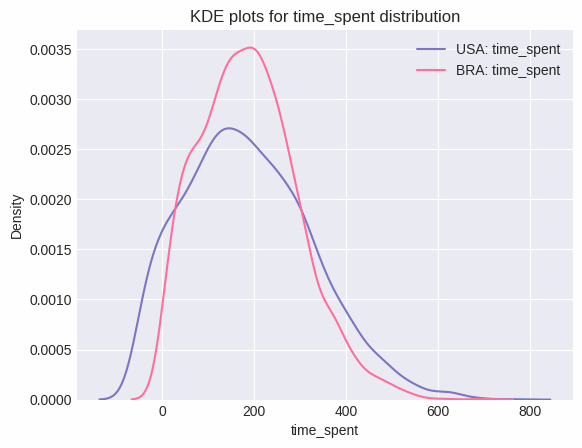

In [204]:
sns.kdeplot(df_users_USA["time_spent"] - shift, label="USA: time_spent")
sns.kdeplot(df_users_BRA["time_spent"], label="BRA: time_spent")
plt.title("KDE plots for time_spent distribution")
plt.legend()
plt.show()

Построив kdeplot, можно увидеть, что в принципе формы распределений похожи, а разброс по данным США можно связать с большим объемом выборки. Так что гипотезу 4 можно принять (сделав аналогичные выводы как для теста Манна-Уитни)

### Задание 3

Сравните результаты из 4 пунктов с результатами бутстрапа и обоснуйте различия, если они есть. Определите какой подход мощнее в конкретном случае и почему.

#### Основное:
Результаты стат. тестов подтверждены бутстрапом.

#### О мощности:

**1. Медианы возраста зарегистрированных людей в 2017 и 2018 годах совпадают.**

Для первой гипотезы использовался тест Уилкоксона, для которого гипотеза строится как раз на разнице медиан, следовательно, в данном случае, этот тест мощнее бутстрапа.

**2. Распределение времени проведенного людьми времени в сервисе в 2017 и 2018 годах совпадают.**

Для данной гипотезы тест Колмогорова-Смирнова, т. к. параметрический критерий, то будет мощнее бутстрапа.

**3. Предпочтения в выборе OS у мужчин и женщин. Правда ли, что распределения одинаковы.**

Для данной гипотезы тест Хи-квадрат, т. к. параметрический критерий, то  будет мощнее бутстрапа.

**4. Распределения времени, проведенного людьми в сервисе, для Бразилии и США совпадаю с точностью до смещения.**

Для данной гипотезы использовался тест Уилкоксона-Манна-Уитни, по которому гипотеза была принята, но при последующей проверке тестом Колмогорова-Смирнова отвергнута. Бутстрап же подтвердил результат теста Манна-Уитни. Здесь о мощности критериев я дать ответ затрудняюсь.
Такое ощущение, что здесь будет более мощен здравый смысл (описан после теста Манна-Уитни для гипотезы 4).


# Пасхалка

## Аслан, с наступающим или уже наступивышим новым годом!

Спасибо за Ваши лекции и семенары! Одни из самых интересных занятий, что я посещал😊!

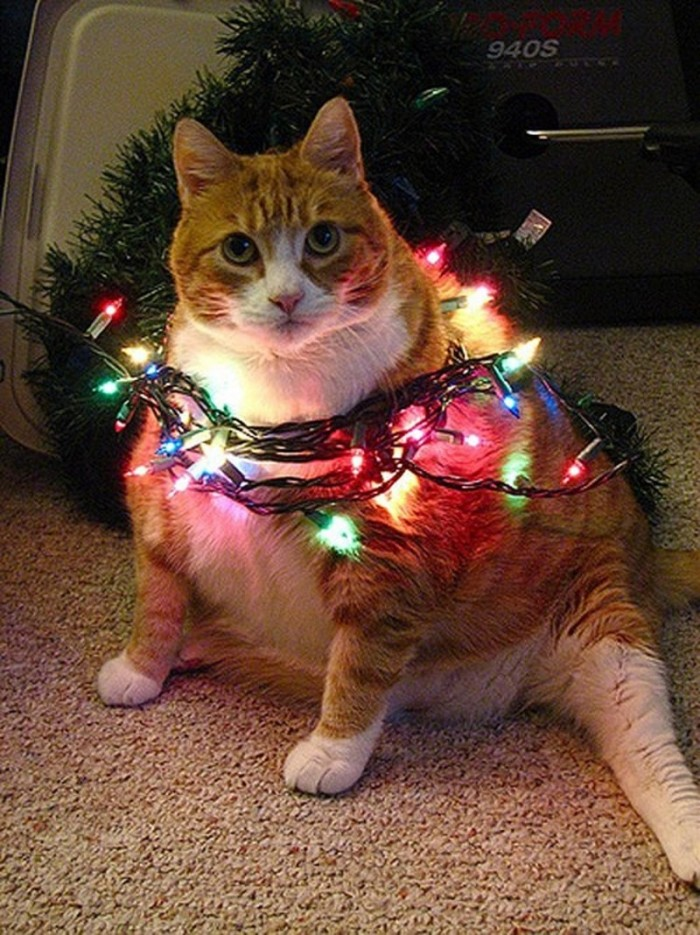

In [210]:
from IPython import display
display.Image("cat_NY.jpg")